# 0.0 - Imports Libraries

In [1]:
import warnings

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn import metrics as mt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
warnings.filterwarnings('ignore')

# 1.0 - Load Data

In [3]:
# Dataset 
df_X = pd.read_csv( '../dataset/clusterizacao/X_dataset.csv')

# 2.0 - K-Means

## Parametro
* K

## 2.1 - Elbow Method

In [4]:
n_clusters = np.arange( 2,11 )
init = 'k-means++'
n_init = 10

ss_list = []
inertia_list = []

In [5]:
# Find best k
for c in n_clusters:
    kmeans = KMeans(
        n_clusters=c,
        init=init, 
        n_init=n_init,
        random_state=77,
    )

    # Predict
    labels = kmeans.fit_predict( df_X )

    # Performance
    ss = mt.silhouette_score( df_X, labels )
    ss_list.append( ss )

    inertia_list.append( kmeans.inertia_ )

    print(f'For n_clusters = {c} - The Average SS = {ss}' )

For n_clusters = 2 - The Average SS = 0.213219480988304
For n_clusters = 3 - The Average SS = 0.23295918228054466
For n_clusters = 4 - The Average SS = 0.2124002459613266
For n_clusters = 5 - The Average SS = 0.18808993216327483
For n_clusters = 6 - The Average SS = 0.20088288658197812
For n_clusters = 7 - The Average SS = 0.20793144809035433
For n_clusters = 8 - The Average SS = 0.18846165438347912
For n_clusters = 9 - The Average SS = 0.18245898196629345
For n_clusters = 10 - The Average SS = 0.16982507302463182


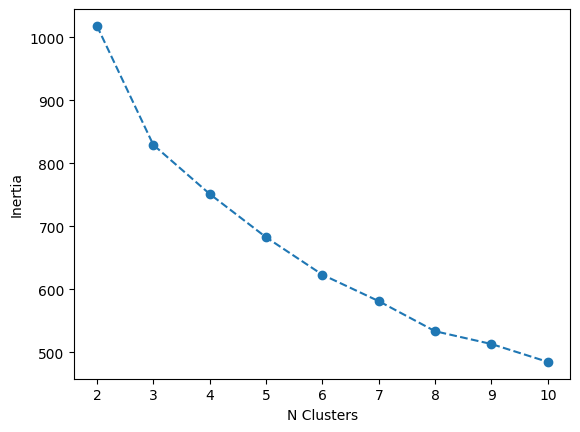

In [6]:
plt.plot( n_clusters, inertia_list, 'o--', label='Inertia')
plt.xlabel( 'N Clusters' )
plt.ylabel( 'Inertia' )
plt.show();

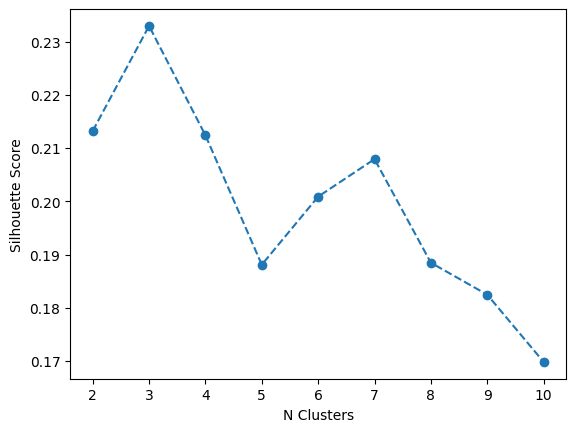

In [7]:
plt.plot( n_clusters, ss_list, 'o--', label='Silhouette Score')
plt.xlabel( 'N Clusters' )
plt.ylabel( 'Silhouette Score' )
plt.show();

## 2.3 - Final Model

In [8]:
best_k = 3

# Training
kmeans = KMeans( n_clusters=best_k, init='k-means++', n_init=10 )
labels = kmeans.fit_predict( df_X )

# Performance Testing
final_ss = mt.silhouette_score( df_X, labels )
final_ss

0.23295918228054466

## 2.4 - PCA

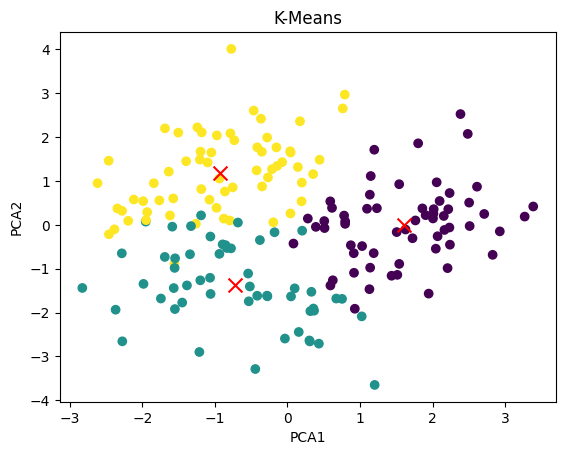

In [9]:
# Reduced X
pca = PCA( n_components=2 )
reduced_X = pca.fit_transform( df_X )
reduced_X = pd.DataFrame(data=reduced_X, columns=['PC1', 'PC2'] )
reduced_X.head()

# reduced centers
centers = pca.transform( kmeans.cluster_centers_ )
centers

# Scatter Plot
plt.scatter( reduced_X['PC1'], reduced_X['PC2'], c=kmeans.labels_ )
plt.scatter( centers[:, 0], centers[:,1], marker='x', s=100, c='red' )
plt.xlabel( 'PCA1' )
plt.ylabel( 'PCA2' )
plt.title( 'K-Means' );

In [10]:
print( f'O melhor k: {best_k}' )
print( f'O melhor ss: {final_ss:.4}' ) 

O melhor k: 3
O melhor ss: 0.233
